<a href="https://colab.research.google.com/github/Ramandeep32/Traffic-Prediction/blob/main/Course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traffic=pd.read_csv('/content/drive/MyDrive/traffic.csv')

In [ ]:
traffic

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
traffic=traffic.drop('ID',axis=1)

In [ ]:
traffic

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


In [ ]:
traffic.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
dtype: int64

In [ ]:
traffic['Date']=traffic['DateTime'].str.split(' ').str[0]
traffic['Time']=traffic['DateTime'].str.split(' ').str[1]
traffic=traffic.drop('DateTime',axis=1)

In [ ]:
traffic['Year']=traffic['Date'].str.split('-').str[0].astype(int)
traffic['Month']=traffic['Date'].str.split('-').str[1].astype(int)
traffic['Day']=traffic['Date'].str.split('-').str[2].astype(int)
traffic=traffic.drop('Date',axis=1)

In [ ]:
traffic['Hour']=pd.to_datetime(traffic['Time']).dt.hour

traffic=traffic.drop('Time',axis=1)

In [ ]:
traffic

,Junction,Vehicles,Year,Month,Day,Hour
0,1,15,2015,11,1,0
1,1,13,2015,11,1,1
2,1,10,2015,11,1,2
3,1,7,2015,11,1,3
4,1,9,2015,11,1,4
...,...,...,...,...,...,...
48115,4,11,2017,6,30,19
48116,4,30,2017,6,30,20
48117,4,16,2017,6,30,21
48118,4,22,2017,6,30,22


In [ ]:
traffic["Year"].value_counts()

2016    26352
2017    17376
2015     4392
Name: Year, dtype: int64

In [ ]:
traffic.describe()

,Junction,Vehicles,Year,Month,Day,Hour
count,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,2016.269825,5.884289,15.700748,11.500000
std,0.966955,20.750063,0.616093,3.569872,8.784073,6.922258
min,1.000000,1.000000,2015.000000,1.000000,1.000000,0.000000
25%,1.000000,9.000000,2016.000000,3.000000,8.000000,5.750000
50%,2.000000,15.000000,2016.000000,5.000000,16.000000,11.500000
75%,3.000000,29.000000,2017.000000,9.000000,23.000000,17.250000
max,4.000000,180.000000,2017.000000,12.000000,31.000000,23.000000


In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   Year      48120 non-null  int64
 3   Month     48120 non-null  int64
 4   Day       48120 non-null  int64
 5   Hour      48120 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


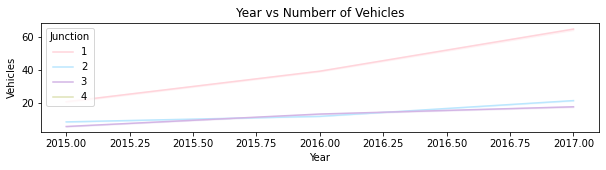

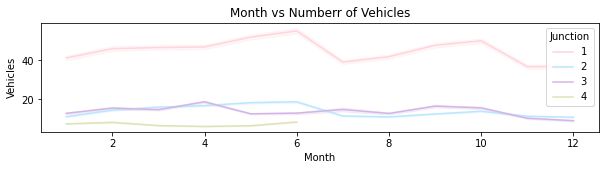

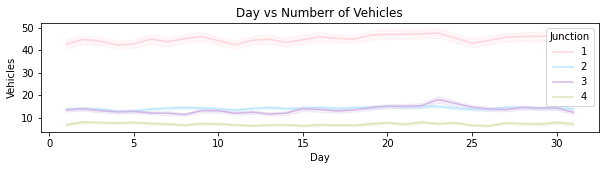

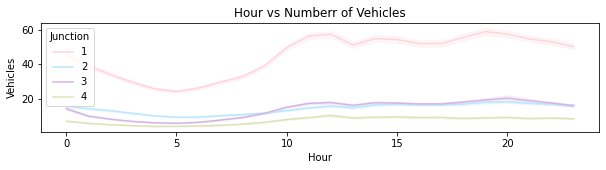

In [ ]:
colors=["#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
for i in traffic.columns:
  if(i!="Junction" and i!="Vehicles"):
    plt.figure(figsize=(10,2))
    plt.title(i+" vs Numberr of Vehicles")
    ax=sns.lineplot(x=traffic[i],y="Vehicles",data=traffic,hue="Junction",palette=colors)

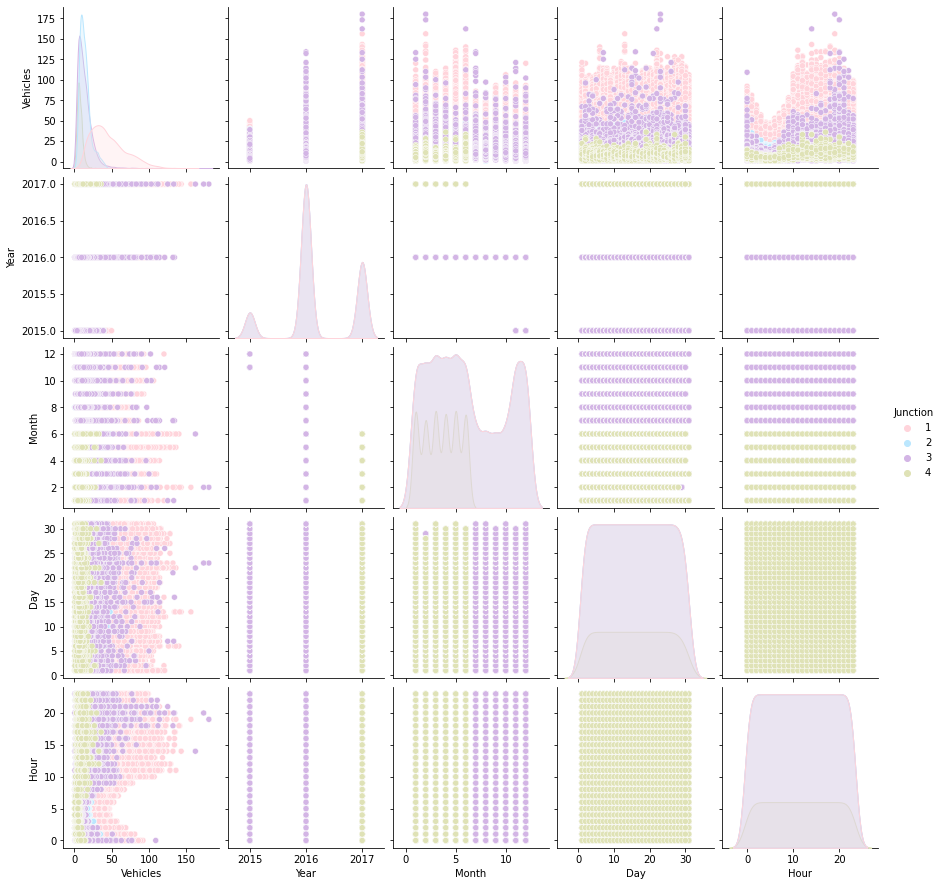

In [ ]:
sns.pairplot(data=traffic,hue="Junction",palette=colors)

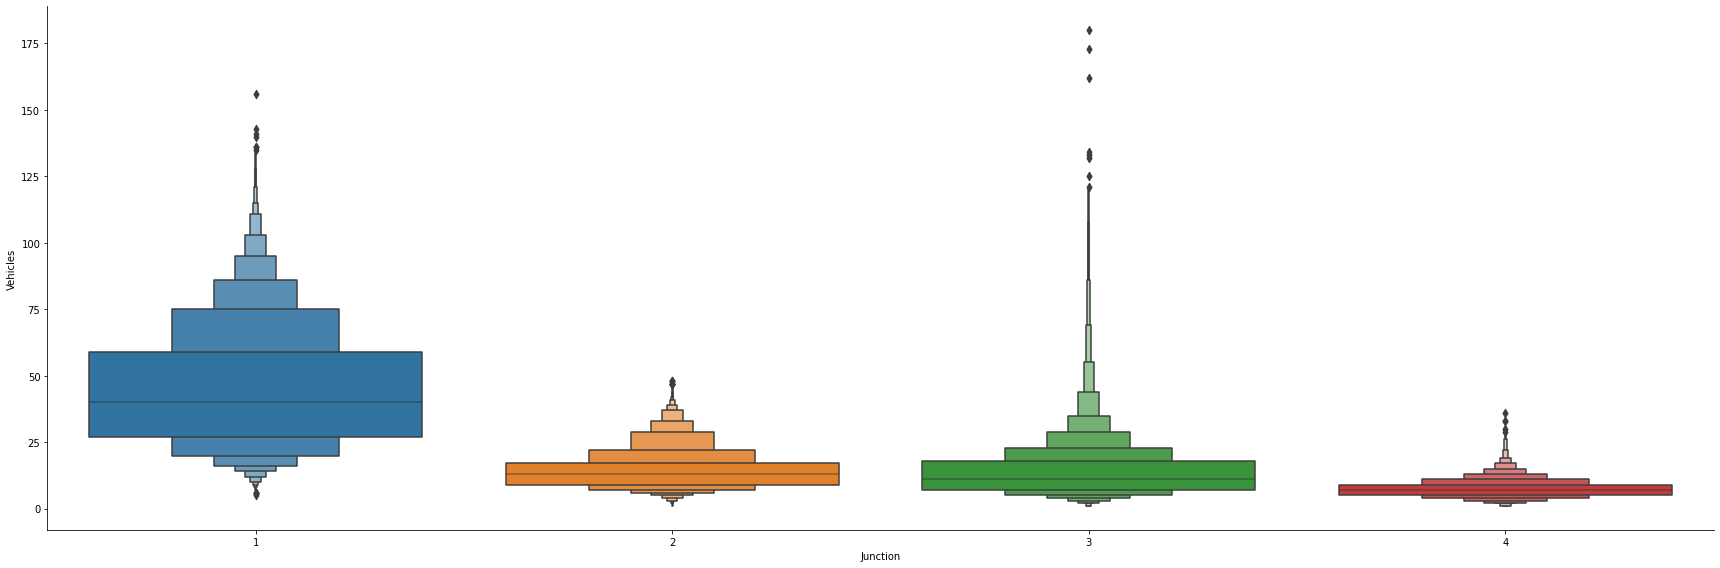

In [ ]:
sns.catplot(y = "Vehicles", x = "Junction", data = traffic.sort_values("Vehicles", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

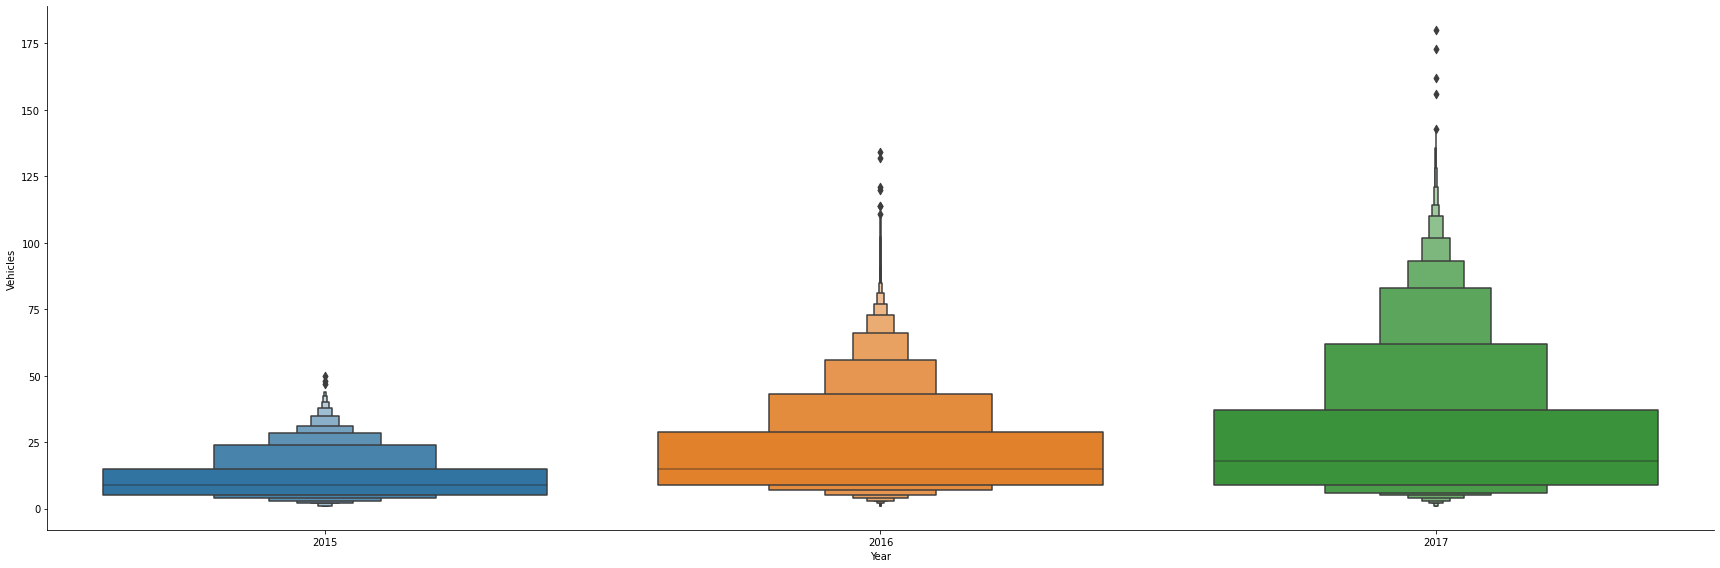

In [ ]:
sns.catplot(y = "Vehicles", x = "Year", data = traffic.sort_values("Vehicles", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

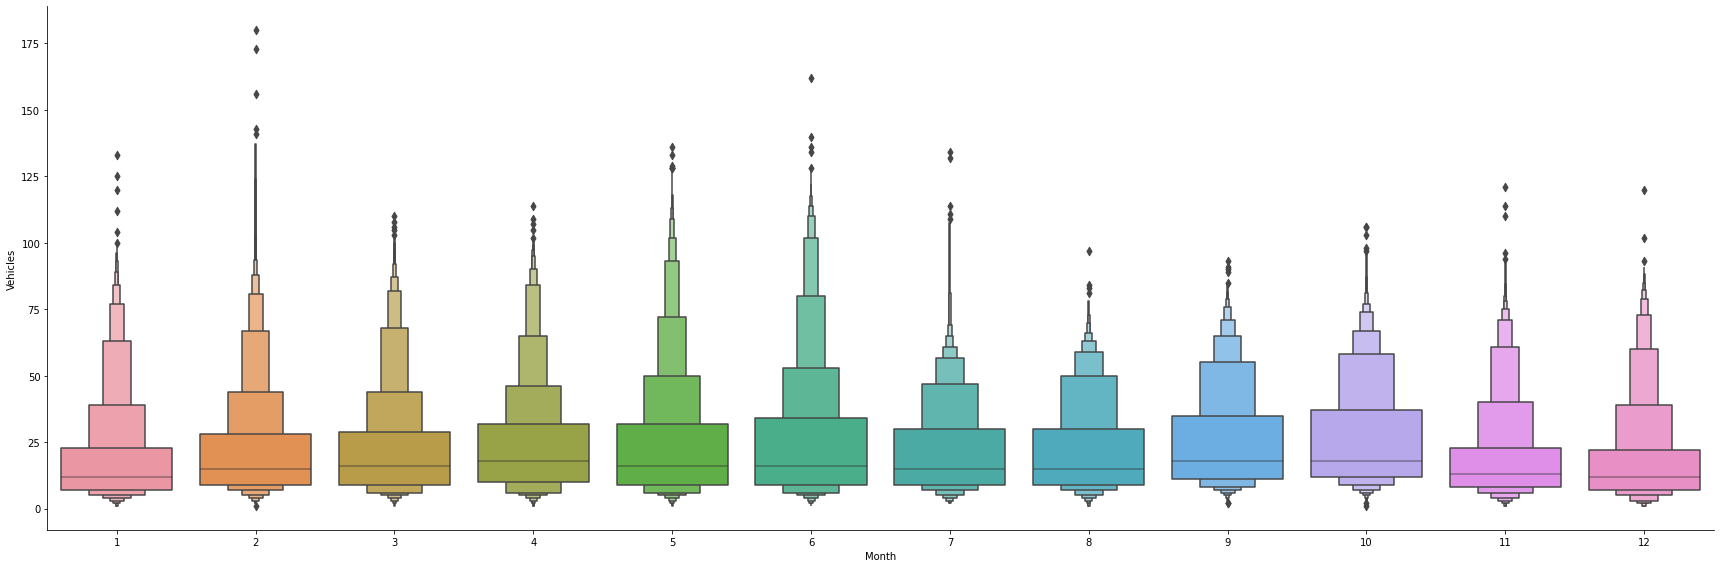

In [ ]:
sns.catplot(y = "Vehicles", x = "Month", data = traffic.sort_values("Vehicles", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

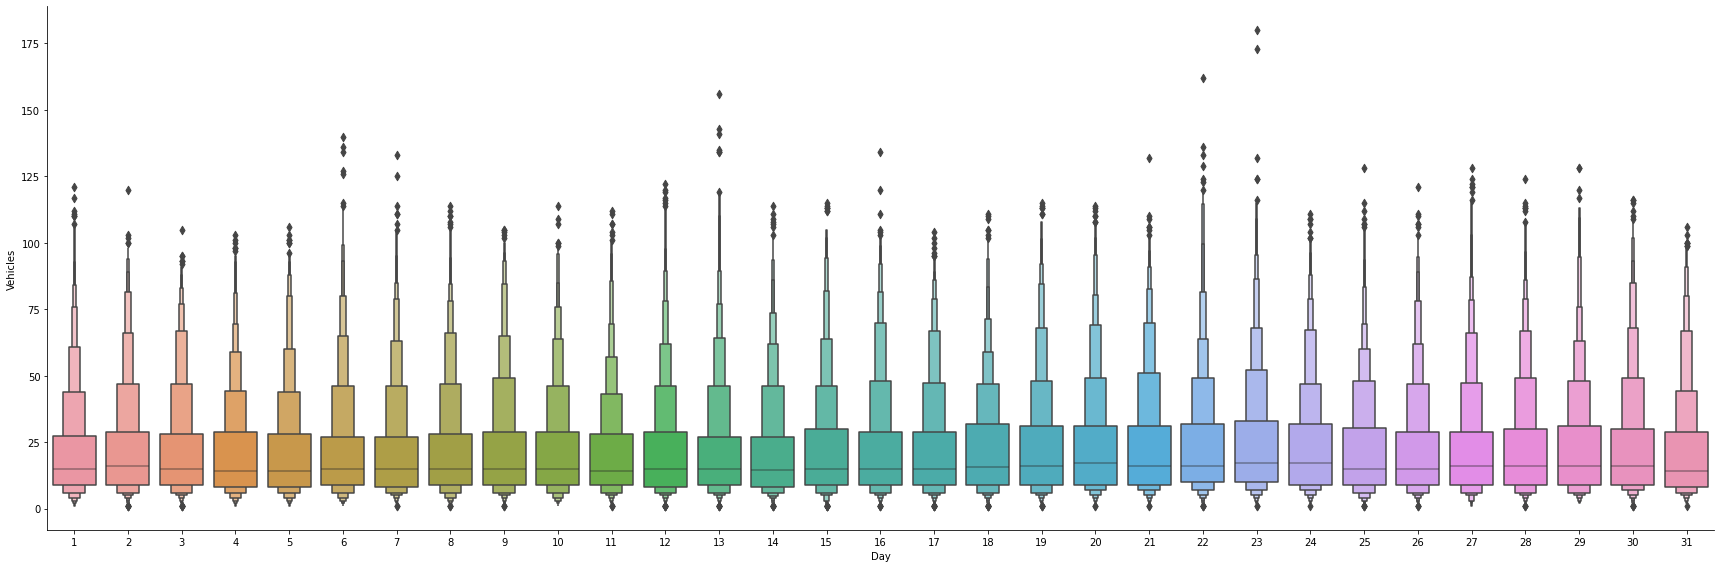

In [ ]:
sns.catplot(y = "Vehicles", x = "Day", data = traffic.sort_values("Vehicles", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

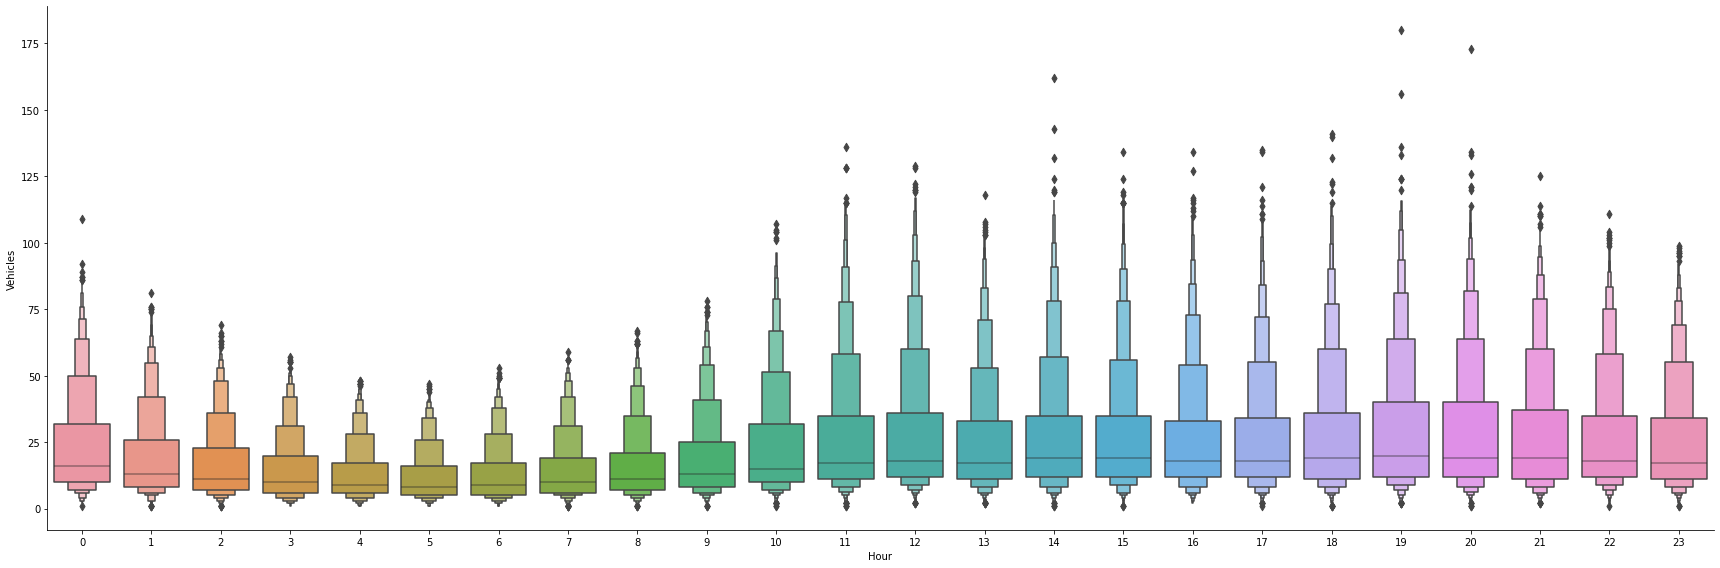

In [ ]:
sns.catplot(y = "Vehicles", x = "Hour", data = traffic.sort_values("Vehicles", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

In [ ]:
traffic_at_1=traffic[traffic["Junction"]==1]
traffic_at_1=traffic_at_1.drop("Junction",axis=1)
vehicle_at_1=traffic_at_1["Vehicles"]
traffic_at_1=traffic_at_1.drop("Vehicles",axis=1)
traffic_at_1

,Year,Month,Day,Hour
0,2015,11,1,0
1,2015,11,1,1
2,2015,11,1,2
3,2015,11,1,3
4,2015,11,1,4
...,...,...,...,...
14587,2017,6,30,19
14588,2017,6,30,20
14589,2017,6,30,21
14590,2017,6,30,22


In [ ]:
new_index=range(0,14592)
new_index

range(0, 14592)

In [ ]:
traffic_at_2=traffic[traffic["Junction"]==2]
traffic_at_2=traffic_at_2.drop("Junction",axis=1)
vehicle_at_2=traffic_at_2["Vehicles"]
traffic_at_2=traffic_at_2.drop("Vehicles",axis=1)
traffic_at_2.reset_index(inplace=True,drop=True)
traffic_at_2

,Year,Month,Day,Hour
0,2015,11,1,0
1,2015,11,1,1
2,2015,11,1,2
3,2015,11,1,3
4,2015,11,1,4
...,...,...,...,...
14587,2017,6,30,19
14588,2017,6,30,20
14589,2017,6,30,21
14590,2017,6,30,22


In [ ]:
traffic_at_3=traffic[traffic["Junction"]==3]
traffic_at_3=traffic_at_3.drop("Junction",axis=1)
vehicle_at_3=traffic_at_3["Vehicles"]
traffic_at_3=traffic_at_3.drop("Vehicles",axis=1)
traffic_at_3.reset_index(inplace=True,drop=True)
traffic_at_3

,Year,Month,Day,Hour
0,2015,11,1,0
1,2015,11,1,1
2,2015,11,1,2
3,2015,11,1,3
4,2015,11,1,4
...,...,...,...,...
14587,2017,6,30,19
14588,2017,6,30,20
14589,2017,6,30,21
14590,2017,6,30,22


In [ ]:
traffic_at_4=traffic[traffic["Junction"]==4]
traffic_at_4=traffic_at_4.drop("Junction",axis=1)
vehicle_at_4=traffic_at_4["Vehicles"]
traffic_at_4=traffic_at_4.drop("Vehicles",axis=1)
traffic_at_4.reset_index(inplace=True,drop=True)
traffic_at_4

,Year,Month,Day,Hour
0,2017,1,1,0
1,2017,1,1,1
2,2017,1,1,2
3,2017,1,1,3
4,2017,1,1,4
...,...,...,...,...
4339,2017,6,30,19
4340,2017,6,30,20
4341,2017,6,30,21
4342,2017,6,30,22


Building Models

In [ ]:
x_train_for_traffic_at_1,x_test_for_traffic_at_1,y_train_for_traffic_at_1,y_test_for_traffic_at_1=train_test_split(traffic_at_1,vehicle_at_1,test_size=0.3)
x_train_for_traffic_at_2,x_test_for_traffic_at_2,y_train_for_traffic_at_2,y_test_for_traffic_at_2=train_test_split(traffic_at_2,vehicle_at_2,test_size=0.3)
x_train_for_traffic_at_3,x_test_for_traffic_at_3,y_train_for_traffic_at_3,y_test_for_traffic_at_3=train_test_split(traffic_at_3,vehicle_at_3,test_size=0.3)
x_train_for_traffic_at_4,x_test_for_traffic_at_4,y_train_for_traffic_at_4,y_test_for_traffic_at_4=train_test_split(traffic_at_4,vehicle_at_4,test_size=0.3)


1. Decision Tree Regressor


a. At junction 1

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree1 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred1 = tree1.predict(x_test_for_traffic_at_1)
print("Test Results for Decision Tree Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_1,y_test_pred1))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_1,y_test_pred1))
print("R-Squared: ", r2_score(y_test_for_traffic_at_1,y_test_pred1))

Test Results for Decision Tree Regressor Model:
Mean squared Error:  57.98739981677538
Mean Absolute  Error:  5.199879119866922
R-Squared:  0.8906594156078559


b. At Junction 2

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree2 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred2 = tree2.predict(x_test_for_traffic_at_2)
print("Test Results for Decision Tree Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_2,y_test_pred2))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_2,y_test_pred2))
print("R-Squared: ", r2_score(y_test_for_traffic_at_2,y_test_pred2))

Test Results for Decision Tree Regressor Model:
Mean squared Error:  15.301831528517761
Mean Absolute  Error:  2.856731233717208
R-Squared:  0.7231593037445904


c. At Junction 3

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree3 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred3 = tree3.predict(x_test_for_traffic_at_3)
print("Test Results for Decision Tree Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_3,y_test_pred3))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_3,y_test_pred3))
print("R-Squared: ", r2_score(y_test_for_traffic_at_3,y_test_pred3))

Test Results for Decision Tree Regressor Model:
Mean squared Error:  64.66806078446945
Mean Absolute  Error:  3.77898895600923
R-Squared:  0.45122110749513855


d. at Junction 4

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree4 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred4 = tree4.predict(x_test_for_traffic_at_4)
print("Test Results for Decision Tree Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_4,y_test_pred4))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_4,y_test_pred4))
print("R-Squared: ", r2_score(y_test_for_traffic_at_4,y_test_pred4))

Test Results for Decision Tree Regressor Model:
Mean squared Error:  7.2926674801736375
Mean Absolute  Error:  1.9706190841900828
R-Squared:  0.43139420902618775


2. Random Forest Regressor

a. At Junction 1

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree1 = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)
tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred1 = tree1.predict(x_test_for_traffic_at_1)
print("Test Results for Random Forest Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_1,y_test_pred1))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_1,y_test_pred1))
print("R-Squared: ", r2_score(y_test_for_traffic_at_1,y_test_pred1))

Test Results for Random Forest Regressor Model:
Mean squared Error:  32.72703959399004
Mean Absolute  Error:  4.190201446439454
R-Squared:  0.9382901518961279


b. At Junction 2

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree2 = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)
tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred2 = tree2.predict(x_test_for_traffic_at_2)
print("Test Results for Random Forest Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_2,y_test_pred2))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_2,y_test_pred2))
print("R-Squared: ", r2_score(y_test_for_traffic_at_2,y_test_pred2))

Test Results for Random Forest Regressor Model:
Mean squared Error:  7.946997513781448
Mean Absolute  Error:  2.194350759374629
R-Squared:  0.856222941629238


c. At Junction 3

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree3 = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)
tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred3 = tree3.predict(x_test_for_traffic_at_3)
print("Test Results for Random Forest Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_3,y_test_pred3))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_3,y_test_pred3))
print("R-Squared: ", r2_score(y_test_for_traffic_at_3,y_test_pred3))

Test Results for Random Forest Regressor Model:
Mean squared Error:  34.88149932593869
Mean Absolute  Error:  2.9952990650106917
R-Squared:  0.7039925067059554


d. at Junction 4

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree4 = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)
tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred4 = tree4.predict(x_test_for_traffic_at_4)
print("Test Results for Random Forest Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_4,y_test_pred4))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_4,y_test_pred4))
print("R-Squared: ", r2_score(y_test_for_traffic_at_4,y_test_pred4))

Test Results for Random Forest Regressor Model:
Mean squared Error:  6.231813836924429
Mean Absolute  Error:  1.8730169525835823
R-Squared:  0.5141084595479741


3. Ada boost Regressor

a. At Junction 1

In [ ]:
estimators = list(range(10,1000,10))
param_grid = dict(n_estimators=estimators)
tree1 = GridSearchCV(AdaBoostRegressor(), param_grid, cv = 10)
tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300, ...]})

In [ ]:
y_test_pred1 = tree1.predict(x_test_for_traffic_at_1)
print("Test Results for Ada Boost Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_1,y_test_pred1))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_1,y_test_pred1))
print("R-Squared: ", r2_score(y_test_for_traffic_at_1,y_test_pred1))

Test Results for Ada Boost Regressor Model:
Mean squared Error:  160.3052710570683
Mean Absolute  Error:  10.129147890272435
R-Squared:  0.6898933661520725


b. At Junction 2

In [ ]:
estimators = list(range(10,1000,10))
param_grid = dict(n_estimators=estimators)
tree2 = GridSearchCV(AdaBoostRegressor(), param_grid, cv = 10)
tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)


GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300, ...]})

In [ ]:
y_test_pred2 = tree2.predict(x_test_for_traffic_at_2)
print("Test Results for Ada Boost Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_2,y_test_pred2))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_2,y_test_pred2))
print("R-Squared: ", r2_score(y_test_for_traffic_at_2,y_test_pred2))

Test Results for Ada Boost Regressor Model:
Mean squared Error:  21.289529717064973
Mean Absolute  Error:  3.6429154067160057
R-Squared:  0.5928761771337833


c. At Junction 3

In [ ]:
estimators = list(range(10,1000,10))
param_grid = dict(n_estimators=estimators)
tree3 = GridSearchCV(AdaBoostRegressor(), param_grid, cv = 10)
tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)


GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300, ...]})

In [ ]:
y_test_pred3 = tree3.predict(x_test_for_traffic_at_3)
print("Test Results for Ada Boost Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_3,y_test_pred3))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_3,y_test_pred3))
print("R-Squared: ", r2_score(y_test_for_traffic_at_3,y_test_pred3))

Test Results for Ada Boost Regressor Model:
Mean squared Error:  102.0534095264787
Mean Absolute  Error:  6.626039135203553
R-Squared:  0.05882240107308023


d. at Junction 4

In [ ]:
estimators = list(range(10,1000,10))
param_grid = dict(n_estimators=estimators)
tree4 = GridSearchCV(AdaBoostRegressor(), param_grid, cv = 10)
tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)


GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300, ...]})

In [ ]:
y_test_pred4 = tree4.predict(x_test_for_traffic_at_4)
print("Test Results for Ada Boost Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_4,y_test_pred4))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_4,y_test_pred4))
print("R-Squared: ", r2_score(y_test_for_traffic_at_4,y_test_pred4))

Test Results for Ada Boost Regressor Model:
Mean squared Error:  8.369936948954162
Mean Absolute  Error:  2.1132129942399427
R-Squared:  0.35349516301591666


4. LightGBM Regressor

a. At Junction 1

In [ ]:
import lightgbm
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree1 = GridSearchCV(LGBMRegressor(), param_grid, cv = 10)
tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred1 = tree1.predict(x_test_for_traffic_at_1)
print("Test Results for LightGBM Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_1,y_test_pred1))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_1,y_test_pred1))
print("R-Squared: ", r2_score(y_test_for_traffic_at_1,y_test_pred1))

Test Results for LightGBM Regressor Model:
Mean squared Error:  60.56201883498441
Mean Absolute  Error:  5.7952542548860055
R-Squared:  0.8828442528676058


b. At Junction 2

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree2 = GridSearchCV(LGBMRegressor(), param_grid, cv = 10)
tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)


GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred2 = tree2.predict(x_test_for_traffic_at_2)
print("Test Results for LightGBM Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_2,y_test_pred2))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_2,y_test_pred2))
print("R-Squared: ", r2_score(y_test_for_traffic_at_2,y_test_pred2))

Test Results for LightGBM Regressor Model:
Mean squared Error:  10.369219275267413
Mean Absolute  Error:  2.450102550918745
R-Squared:  0.8017074004175361


c. At Junction 3

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree3 = GridSearchCV(LGBMRegressor(), param_grid, cv = 10)
tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)


GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred3 = tree3.predict(x_test_for_traffic_at_3)
print("Test Results for LightGBM Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_3,y_test_pred3))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_3,y_test_pred3))
print("R-Squared: ", r2_score(y_test_for_traffic_at_3,y_test_pred3))

Test Results for LightGBM Regressor Model:
Mean squared Error:  42.5776308369105
Mean Absolute  Error:  3.482788189664116
R-Squared:  0.6073319593630739


d. at Junction 4

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree4 = GridSearchCV(LGBMRegressor(), param_grid, cv = 10)
tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)


GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_test_pred4 = tree4.predict(x_test_for_traffic_at_4)
print("Test Results for lightGBM Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_4,y_test_pred4))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_4,y_test_pred4))
print("R-Squared: ", r2_score(y_test_for_traffic_at_4,y_test_pred4))

Test Results for lightGBM Regressor Model:
Mean squared Error:  6.557210257758364
Mean Absolute  Error:  1.8464858508474624
R-Squared:  0.49351253484745383


5. XGBoost Regressor

a. At Junction 1

In [ ]:
tree1 =XGBRegressor()
tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

[20:06:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_test_pred1 = tree1.predict(x_test_for_traffic_at_1)
print("Test Results for XGBoost Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_1,y_test_pred1))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_1,y_test_pred1))
print("R-Squared: ", r2_score(y_test_for_traffic_at_1,y_test_pred1))

Test Results for XGBoost Regressor Model:
Mean squared Error:  108.20010799438248
Mean Absolute  Error:  7.73606934630201
R-Squared:  0.7906895322227103


b. At Junction 2

In [ ]:
tree2 = XGBRegressor()
tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)


[20:06:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_test_pred2 = tree2.predict(x_test_for_traffic_at_2)
print("Test Results for XGBoost Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_2,y_test_pred2))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_2,y_test_pred2))
print("R-Squared: ", r2_score(y_test_for_traffic_at_2,y_test_pred2))

Test Results for XGBoost Regressor Model:
Mean squared Error:  16.128113445552938
Mean Absolute  Error:  3.006217723243473
R-Squared:  0.691578945667816


c. At Junction 3

In [ ]:
tree3 = XGBRegressor()
tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)


[20:06:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_test_pred3 = tree3.predict(x_test_for_traffic_at_3)
print("Test Results for XGBoost Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_3,y_test_pred3))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_3,y_test_pred3))
print("R-Squared: ", r2_score(y_test_for_traffic_at_3,y_test_pred3))

Test Results for XGBoost Regressor Model:
Mean squared Error:  61.13316712498687
Mean Absolute  Error:  4.354448890920206
R-Squared:  0.4362053387881697


d. at Junction 4

In [ ]:
tree4 = XGBRegressor()
tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)


[20:06:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_test_pred4 = tree4.predict(x_test_for_traffic_at_4)
print("Test Results for XGBoost Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_4,y_test_pred4))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_4,y_test_pred4))
print("R-Squared: ", r2_score(y_test_for_traffic_at_4,y_test_pred4))

Test Results for XGBoost Regressor Model:
Mean squared Error:  6.966248008688024
Mean Absolute  Error:  1.877019487709904
R-Squared:  0.4619179259396581


6. Bayesian Ridge Regressor

a. At Junction 1

In [ ]:
tree1 =linear_model.BayesianRidge()
tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

BayesianRidge()

In [ ]:
y_test_pred1 = tree1.predict(x_test_for_traffic_at_1)
print("Test Results for Bayesian Ridge Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_1,y_test_pred1))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_1,y_test_pred1))
print("R-Squared: ", r2_score(y_test_for_traffic_at_1,y_test_pred1))

Test Results for Bayesian Ridge Regressor Model:
Mean squared Error:  193.990783686721
Mean Absolute  Error:  11.232204610429724
R-Squared:  0.6247295642250312


b. At Junction 2

In [ ]:
tree2 = linear_model.BayesianRidge()
tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)


BayesianRidge()

In [ ]:
y_test_pred2 = tree2.predict(x_test_for_traffic_at_2)
print("Test Results for Bayesian Ridge Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_2,y_test_pred2))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_2,y_test_pred2))
print("R-Squared: ", r2_score(y_test_for_traffic_at_2,y_test_pred2))

Test Results for Bayesian Ridge Regressor Model:
Mean squared Error:  25.719275905937295
Mean Absolute  Error:  3.9120510805826885
R-Squared:  0.50816527808113


c. At Junction 3

In [ ]:
tree3 = linear_model.BayesianRidge()
tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)


BayesianRidge()

In [ ]:
y_test_pred3 = tree3.predict(x_test_for_traffic_at_3)
print("Test Results for Bayesian Ridge Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_3,y_test_pred3))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_3,y_test_pred3))
print("R-Squared: ", r2_score(y_test_for_traffic_at_3,y_test_pred3))

Test Results for Bayesian Ridge Regressor Model:
Mean squared Error:  81.38149080034194
Mean Absolute  Error:  5.550717996391379
R-Squared:  0.2494671519163122


d. at Junction 4

In [ ]:
tree4 = linear_model.BayesianRidge()
tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)


BayesianRidge()

In [ ]:
y_test_pred4 = tree4.predict(x_test_for_traffic_at_4)
print("Test Results for Bayesian Ridge Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_4,y_test_pred4))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_4,y_test_pred4))
print("R-Squared: ", r2_score(y_test_for_traffic_at_4,y_test_pred4))

Test Results for Bayesian Ridge Regressor Model:
Mean squared Error:  10.483492841676911
Mean Absolute  Error:  2.316147474971
R-Squared:  0.19024135164136302


7. Lasso Regressor

a. At Junction 1

In [ ]:
tree1 =linear_model.Lasso()
tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

Lasso()

In [ ]:
y_test_pred1 = tree1.predict(x_test_for_traffic_at_1)
print("Test Results for Lasso Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_1,y_test_pred1))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_1,y_test_pred1))
print("R-Squared: ", r2_score(y_test_for_traffic_at_1,y_test_pred1))

Test Results for Lasso Regressor Model:
Mean squared Error:  198.5359086684828
Mean Absolute  Error:  11.362306090119331
R-Squared:  0.6159371308931885


b. At Junction 2

In [ ]:
tree2 = linear_model.Lasso()
tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)


Lasso()

In [ ]:
y_test_pred2 = tree2.predict(x_test_for_traffic_at_2)
print("Test Results for Lasso Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_2,y_test_pred2))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_2,y_test_pred2))
print("R-Squared: ", r2_score(y_test_for_traffic_at_2,y_test_pred2))

Test Results for Lasso Regressor Model:
Mean squared Error:  30.2905720059333
Mean Absolute  Error:  4.1018978985256815
R-Squared:  0.42074749251154


c. At Junction 3

In [ ]:
tree3 = linear_model.Lasso()
tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)


Lasso()

In [ ]:
y_test_pred3 = tree3.predict(x_test_for_traffic_at_3)
print("Test Results for Lasso Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_3,y_test_pred3))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_3,y_test_pred3))
print("R-Squared: ", r2_score(y_test_for_traffic_at_3,y_test_pred3))

Test Results for Lasso Regressor Model:
Mean squared Error:  84.39072818774072
Mean Absolute  Error:  5.712040374423742
R-Squared:  0.22171475410800323


d. at Junction 4

In [ ]:
tree4 = linear_model.Lasso()
tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)


Lasso()

In [ ]:
y_test_pred4 = tree4.predict(x_test_for_traffic_at_4)
print("Test Results for Lasso Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_4,y_test_pred4))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_4,y_test_pred4))
print("R-Squared: ", r2_score(y_test_for_traffic_at_4,y_test_pred4))

Test Results for Lasso Regressor Model:
Mean squared Error:  10.502998381000001
Mean Absolute  Error:  2.31853474114621
R-Squared:  0.188734718365955


8. K Neighbors Regressor

a. At Junction 1

In [ ]:
neighbors = list(range(2,20))
param_grid = dict(n_neighbors = neighbors)
tree1 = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 10)
tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19]})

In [ ]:
y_test_pred1 = tree1.predict(x_test_for_traffic_at_1)
print("Test Results for K Neighbor Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_1,y_test_pred1))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_1,y_test_pred1))
print("R-Squared: ", r2_score(y_test_for_traffic_at_1,y_test_pred1))

Test Results for K Neighbor Regressor Model:
Mean squared Error:  128.27592507994518
Mean Absolute  Error:  8.624143444495203
R-Squared:  0.7518533541164131


b. At Junction 2

In [ ]:
neighbors = list(range(2,20))
param_grid = dict(n_neighbors = neighbors)
tree2 = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 10)
tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19]})

In [ ]:
y_test_pred2 = tree2.predict(x_test_for_traffic_at_2)
print("Test Results for K Neighbor Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_2,y_test_pred2))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_2,y_test_pred2))
print("R-Squared: ", r2_score(y_test_for_traffic_at_2,y_test_pred2))

Test Results for K Neighbor Regressor Model:
Mean squared Error:  16.589224531749657
Mean Absolute  Error:  3.106212882594792
R-Squared:  0.6827610285661562


c. At Junction 3

In [ ]:
neighbors = list(range(2,20))
param_grid = dict(n_neighbors = neighbors)
tree3 = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 10)
tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19]})

In [ ]:
y_test_pred3 = tree3.predict(x_test_for_traffic_at_3)
print("Test Results for K Neighbor Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_3,y_test_pred3))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_3,y_test_pred3))
print("R-Squared: ", r2_score(y_test_for_traffic_at_3,y_test_pred3))

Test Results for K Neighbor Regressor Model:
Mean squared Error:  50.34569152581087
Mean Absolute  Error:  4.12762677021471
R-Squared:  0.5356917785849794


d. at Junction 4

In [ ]:
neighbors = list(range(2,20))
param_grid = dict(n_neighbors = neighbors)
tree4 = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 10)
tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19]})

In [ ]:
y_test_pred4 = tree4.predict(x_test_for_traffic_at_4)
print("Test Results for K Neighbor Regressor Model:")
print("Mean squared Error: ", mean_squared_error(y_test_for_traffic_at_4,y_test_pred4))
print("Mean Absolute  Error: ", mean_absolute_error(y_test_for_traffic_at_4,y_test_pred4))
print("R-Squared: ", r2_score(y_test_for_traffic_at_4,y_test_pred4))

Test Results for K Neighbor Regressor Model:
Mean squared Error:  7.686104294478528
Mean Absolute  Error:  1.9826687116564414
R-Squared:  0.40631528836481845


Best models for all Junctions Random Forest Regressor






Hyperparameter Tuning

In [ ]:
depth=range(2,30)
r2score1=[]
best1=0
max1=0
r2score2=[]
best2=0
max2=0
r2score3=[]
best3=0
max3=0
r2score4=[]
best4=0
max4=0
for i in depth:
  tree1=RandomForestRegressor(max_depth=i)
  tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)
  y_predict1=tree1.predict(x_test_for_traffic_at_1)
  r2score1.append(r2_score(y_test_for_traffic_at_1,y_predict1))
  if r2_score(y_test_for_traffic_at_1,y_predict1)>max1:
    best1=i
    max1=r2_score(y_test_for_traffic_at_1,y_predict1)
  tree2=RandomForestRegressor(max_depth=i)
  tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)
  y_predict2=tree2.predict(x_test_for_traffic_at_2)
  r2score2.append(r2_score(y_test_for_traffic_at_2,y_predict2))
  if r2_score(y_test_for_traffic_at_2,y_predict2)>max2:
    best2=i
    max2=r2_score(y_test_for_traffic_at_2,y_predict2)
  tree3=RandomForestRegressor(max_depth=i)
  tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)
  y_predict3=tree3.predict(x_test_for_traffic_at_3)
  r2score3.append(r2_score(y_test_for_traffic_at_3,y_predict3))
  if r2_score(y_test_for_traffic_at_3,y_predict3)>max3:
    best3=i
    max3=r2_score(y_test_for_traffic_at_3,y_predict3)
  tree4=RandomForestRegressor(max_depth=i)
  tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)
  y_predict4=tree4.predict(x_test_for_traffic_at_4)
  r2score4.append(r2_score(y_test_for_traffic_at_4,y_predict4))
  if r2_score(y_test_for_traffic_at_4,y_predict4)>max4:
    best4=i
    max4=r2_score(y_test_for_traffic_at_4,y_predict4)


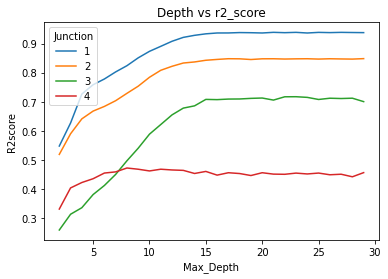

Max Depth for juntion 1 is 21 with r2_score= 0.9388810697908896
Max Depth for juntion 2 is 29 with r2_score= 0.8484384822961382
Max Depth for juntion 3 is 23 with r2_score= 0.7174293689754117
Max Depth for juntion 4 is 8 with r2_score= 0.4722171538506742


In [ ]:
x=range(2,30)
plt.plot(x,r2score1,label='1')
plt.plot(x,r2score2,label='2')
plt.plot(x,r2score3,label='3')
plt.plot(x,r2score4,label='4')
plt.title("Depth vs r2_score")
plt.xlabel("Max_Depth")
plt.ylabel("R2score")
plt.legend().set_title("Junction")
plt.show()
print("Max Depth for juntion 1 is",best1,"with r2_score=",max1)
print("Max Depth for juntion 2 is",best2,"with r2_score=",max2)
print("Max Depth for juntion 3 is",best3,"with r2_score=",max3)
print("Max Depth for juntion 4 is",best4,"with r2_score=",max4)

In [ ]:
estimator=range(50,1000,50)
r2score1=[]
best_estimator1=0
max_estimator1=0
r2score2=[]
best_estimator2=0
max_estimator2=0
r2score3=[]
best_estimator3=0
max_estimator3=0
r2score4=[]
best_estimator4=0
max_estimator4=0
for i in estimator:
  tree1=RandomForestRegressor(max_depth=best1,n_estimators=i)
  tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)
  y_predict1=tree1.predict(x_test_for_traffic_at_1)
  r2score1.append(r2_score(y_test_for_traffic_at_1,y_predict1))
  if r2_score(y_test_for_traffic_at_1,y_predict1)>max_estimator1:
    best_estimator1=i
    max_estimator1=r2_score(y_test_for_traffic_at_1,y_predict1)

  tree2=RandomForestRegressor(max_depth=best2,n_estimators=i)
  tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)
  y_predict2=tree2.predict(x_test_for_traffic_at_2)
  r2score2.append(r2_score(y_test_for_traffic_at_2,y_predict2))
  if r2_score(y_test_for_traffic_at_2,y_predict2)>max_estimator2:
    best_estimator2=i
    max_estimator2=r2_score(y_test_for_traffic_at_2,y_predict2)

  tree3=RandomForestRegressor(max_depth=best3,n_estimators=i)
  tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)
  y_predict3=tree3.predict(x_test_for_traffic_at_3)
  r2score3.append(r2_score(y_test_for_traffic_at_3,y_predict3))
  if r2_score(y_test_for_traffic_at_3,y_predict3)>max_estimator3:
    best_estimator3=i
    max_estimator3=r2_score(y_test_for_traffic_at_3,y_predict3)

  tree4=RandomForestRegressor(max_depth=best4,n_estimators=i)
  tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)
  y_predict4=tree4.predict(x_test_for_traffic_at_4)
  r2score4.append(r2_score(y_test_for_traffic_at_4,y_predict4))
  if r2_score(y_test_for_traffic_at_4,y_predict4)>max_estimator4:
    best_estimator4=i
    max_estimator4=r2_score(y_test_for_traffic_at_4,y_predict4)


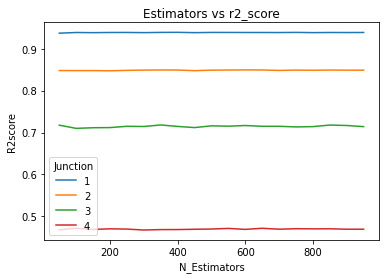

N_estimator for juntion 1 is 400 with r2_score= 0.9395000066526322
N_estimator for juntion 2 is 600 with r2_score= 0.8497361814254084
N_estimator for juntion 3 is 350 with r2_score= 0.7181132824349805
N_estimator for juntion 4 is 100 with r2_score= 0.47122970647218565


In [ ]:
x=range(50,1000,50)
plt.plot(x,r2score1,label='1')
plt.plot(x,r2score2,label='2')
plt.plot(x,r2score3,label='3')
plt.plot(x,r2score4,label='4')
plt.title("Estimators vs r2_score")
plt.xlabel("N_Estimators")
plt.ylabel("R2score")
plt.legend().set_title("Junction")
plt.show()
print("N_estimator for juntion 1 is",best_estimator1,"with r2_score=",max_estimator1)
print("N_estimator for juntion 2 is",best_estimator2,"with r2_score=",max_estimator2)
print("N_estimator for juntion 3 is",best_estimator3,"with r2_score=",max_estimator3)
print("N_estimator for juntion 4 is",best_estimator4,"with r2_score=",max_estimator4)

In [ ]:
leaf_nodes=range(1000,10000,1000)
r2score1=[]
best_leaf1=0
max_leaf1=0
r2score2=[]
best_leaf2=0
max_leaf2=0
r2score3=[]
best_leaf3=0
max_leaf3=0
r2score4=[]
best_leaf4=0
max_leaf4=0
for i in leaf_nodes:
  tree1=RandomForestRegressor(max_depth=best1,n_estimators=best_estimator1,max_leaf_nodes=i)
  tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)
  y_predict1=tree1.predict(x_test_for_traffic_at_1)
  r2score1.append(r2_score(y_test_for_traffic_at_1,y_predict1))
  if r2_score(y_test_for_traffic_at_1,y_predict1)>max_leaf1:
    best_leaf1=i
    max_leaf1=r2_score(y_test_for_traffic_at_1,y_predict1)

  tree2=RandomForestRegressor(max_depth=best2,n_estimators=best_estimator2,max_leaf_nodes=i)
  tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)
  y_predict2=tree2.predict(x_test_for_traffic_at_2)
  r2score2.append(r2_score(y_test_for_traffic_at_2,y_predict2))
  if r2_score(y_test_for_traffic_at_2,y_predict2)>max_leaf2:
    best_leaf2=i
    max_leaf2=r2_score(y_test_for_traffic_at_2,y_predict2)

  tree3=RandomForestRegressor(max_depth=best3,n_estimators=best_estimator3,max_leaf_nodes=i)
  tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)
  y_predict3=tree3.predict(x_test_for_traffic_at_3)
  r2score3.append(r2_score(y_test_for_traffic_at_3,y_predict3))
  if r2_score(y_test_for_traffic_at_3,y_predict3)>max_leaf3:
    best_leaf3=i
    max_leaf3=r2_score(y_test_for_traffic_at_3,y_predict3)

  tree4=RandomForestRegressor(max_depth=best4,n_estimators=best_estimator4,max_leaf_nodes=i)
  tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)
  y_predict4=tree4.predict(x_test_for_traffic_at_4)
  r2score4.append(r2_score(y_test_for_traffic_at_4,y_predict4))
  if r2_score(y_test_for_traffic_at_4,y_predict4)>max_leaf4:
    best_leaf4=i
    max_leaf4=r2_score(y_test_for_traffic_at_4,y_predict4)


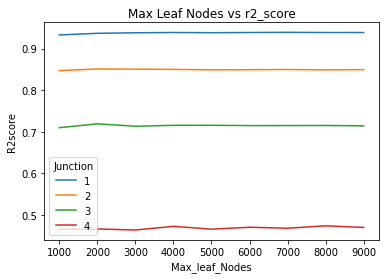

best Max_leaf_Nodes for juntion 1 is 7000 with r2_score= 0.9392994346030296
best Max_leaf_Nodes for juntion 2 is 2000 with r2_score= 0.8511013014494488
best Max_leaf_Nodes for juntion 3 is 2000 with r2_score= 0.7191897699769529
best Max_leaf_Nodes for juntion 4 is 8000 with r2_score= 0.4737199471259518


In [ ]:
x=range(1000,10000,1000)
plt.plot(x,r2score1,label='1')
plt.plot(x,r2score2,label='2')
plt.plot(x,r2score3,label='3')
plt.plot(x,r2score4,label='4')
plt.title("Max Leaf Nodes vs r2_score")
plt.xlabel("Max_leaf_Nodes")
plt.ylabel("R2score")
plt.legend().set_title("Junction")
plt.show()
print("best Max_leaf_Nodes for juntion 1 is",best_leaf1,"with r2_score=",max_leaf1)
print("best Max_leaf_Nodes for juntion 2 is",best_leaf2,"with r2_score=",max_leaf2)
print("best Max_leaf_Nodes for juntion 3 is",best_leaf3,"with r2_score=",max_leaf3)
print("best Max_leaf_Nodes for juntion 4 is",best_leaf4,"with r2_score=",max_leaf4)

In [ ]:
tree1=RandomForestRegressor(max_depth=best1,n_estimators=best_estimator1,max_leaf_nodes=best_leaf1)
tree1.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

RandomForestRegressor(max_depth=21, max_leaf_nodes=7000, n_estimators=400)

In [ ]:
tree2=RandomForestRegressor(max_depth=best2,n_estimators=best_estimator2,max_leaf_nodes=best_leaf2)
tree2.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)

RandomForestRegressor(max_depth=29, max_leaf_nodes=2000, n_estimators=600)

In [ ]:
tree3=RandomForestRegressor(max_depth=best3,n_estimators=best_estimator3,max_leaf_nodes=best_leaf3)
tree3.fit(x_train_for_traffic_at_3,y_train_for_traffic_at_3)

RandomForestRegressor(max_depth=23, max_leaf_nodes=2000, n_estimators=350)

In [ ]:
tree4=RandomForestRegressor(max_depth=best4,n_estimators=best_estimator4,max_leaf_nodes=best_leaf4)
tree4.fit(x_train_for_traffic_at_4,y_train_for_traffic_at_4)

RandomForestRegressor(max_depth=8, max_leaf_nodes=8000)

In [ ]:
vehicle_at_1=vehicle_at_1.iloc[-4344:]
vehicle_at_2=vehicle_at_2.iloc[-4344:]
vehicle_at_3=vehicle_at_3.iloc[-4344:]
vehicle_at_1.reset_index(inplace=True,drop=True)
vehicle_at_2.reset_index(inplace=True,drop=True)
vehicle_at_3.reset_index(inplace=True,drop=True)
vehicle_at_4.reset_index(inplace=True,drop=True)

In [ ]:
y_final=[]

for i in range(len(vehicle_at_4)):
  x=[vehicle_at_1[i],vehicle_at_2[i],vehicle_at_3[i],vehicle_at_4[i]]
  y_final.append(x.index(min(x))+1)
y_final

[4,
 4,
 2,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [ ]:
y_predict1=tree1.predict(traffic_at_4)
y_predict2=tree2.predict(traffic_at_4)
y_predict3=tree3.predict(traffic_at_4)
y_predict4=tree4.predict(traffic_at_4)
y_final_predict=[]
for i in range(len(y_predict4)):
  x=[y_predict1[i],y_predict2[i],y_predict3[i],y_predict4[i]]
  y_final_predict.append(x.index(min(x))+1)
y_final_predict

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [ ]:
from sklearn.metrics import accuracy_score as acc
print("The final accuracy of the model is",str(acc(y_final,y_final_predict)*100)+"%")

The final accuracy of the model is 94.45211786372008%


In [ ]:
tree5=RandomForestRegressor()
tree5.fit(x_train_for_traffic_at_1,y_train_for_traffic_at_1)

RandomForestRegressor()

In [ ]:
import pickle
pickle.dump(tree5,open('reg5.pkl','wb'))


In [ ]:
tree6=RandomForestRegressor()
tree6.fit(x_train_for_traffic_at_2,y_train_for_traffic_at_2)

RandomForestRegressor()

In [ ]:
tre6=open('reg6.pkl','wb')
pickle.dump(tree6,tre6)


In [ ]:



pickle.dump(tree3,open('reg3.pkl','wb'))


In [ ]:
pickle.dump(tree4,open('reg4.pkl','wb'))